In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | kieta
Processing Record 5 of Set 1 | richards bay
Processing Record 6 of Set 1 | mazyr
Processing Record 7 of Set 1 | kavieng
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | mpika
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | mount gambier
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | prince rupert
Processing Record 15 of Set 1 | byron bay
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | grindavik
Processing Record 22 of Set 1 | hithadhoo
Pr

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,72.10,64,0,1.01,ZA,2022-02-05 22:51:37
1,Saint-Philippe,-21.3585,55.7679,80.19,83,100,17.74,RE,2022-02-05 22:52:44
2,Mahebourg,-20.4081,57.7000,79.25,89,40,11.50,MU,2022-02-05 22:52:41
3,Kieta,-6.2167,155.6333,85.15,70,77,8.25,PG,2022-02-05 22:54:49
4,Richards Bay,-28.7830,32.0377,71.31,88,98,7.23,ZA,2022-02-05 22:51:59
5,Mazyr,52.0495,29.2456,32.04,89,100,13.71,BY,2022-02-05 22:54:50
6,Kavieng,-2.5744,150.7967,82.98,73,63,5.03,PG,2022-02-05 22:46:20
7,New Norfolk,-42.7826,147.0587,64.71,56,91,2.39,AU,2022-02-05 22:51:38
8,Mpika,-11.8343,31.4529,61.11,96,98,5.68,ZM,2022-02-05 22:54:51
9,Castro,-24.7911,-50.0119,65.62,97,74,7.09,BR,2022-02-05 22:54:28


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-02-05 22:51:37,-33.9258,18.4232,72.10,64,0,1.01
1,Saint-Philippe,RE,2022-02-05 22:52:44,-21.3585,55.7679,80.19,83,100,17.74
2,Mahebourg,MU,2022-02-05 22:52:41,-20.4081,57.7000,79.25,89,40,11.50
3,Kieta,PG,2022-02-05 22:54:49,-6.2167,155.6333,85.15,70,77,8.25
4,Richards Bay,ZA,2022-02-05 22:51:59,-28.7830,32.0377,71.31,88,98,7.23
...,...,...,...,...,...,...,...,...,...
526,Calabozo,VE,2022-02-05 22:57:29,8.9242,-67.4293,89.44,33,18,3.06
527,Tecoanapa,MX,2022-02-05 22:57:29,16.5167,-98.7500,82.85,54,0,10.27
528,Daru,PG,2022-02-05 22:57:30,-9.0763,143.2092,80.42,83,94,13.20
529,Ostersund,SE,2022-02-05 22:57:30,63.1792,14.6357,23.45,74,20,9.22


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644103149.8018148

In [18]:
today = time.strftime("%x")
today

'02/05/22'

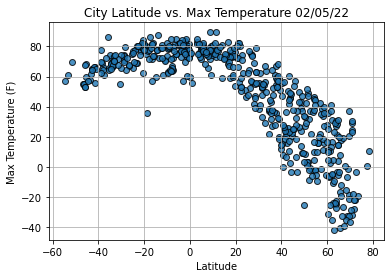

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

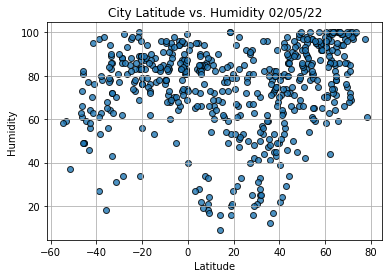

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

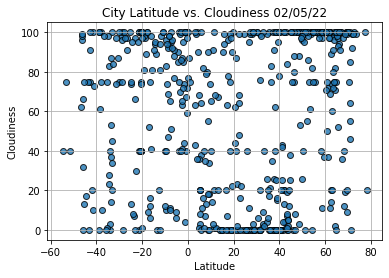

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

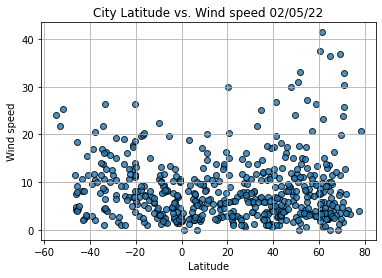

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed(mph) "+ time.strftime("%x"))
plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()